<a href="https://colab.research.google.com/github/QuinnStraubUAG/Capstone/blob/main/Ai_Mapillary_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import os
import cv2
import datetime
import numpy as np
from pathlib import Path
import random
import xml.etree.ElementTree as ET

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer

import pickle

from keras.layers.convolutional import Conv2D
from tensorflow.keras.layers import MaxPooling2D
import tensorflow as tf
from keras.models import Sequential
import keras
import keras.utils
from tensorflow.keras import layers

import json

from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

In [2]:
data = []
labels = []
bboxes = []
imagePaths = []

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
annot_dir  = "/content/gdrive/MyDrive/Mapillary/1st mtsd_fully_annotated_annotation (First Download)/mtsd_fully_annotated_annotation (First Download)/mtsd_v2_fully_annotated/annotations"
images_dir  = "/content/gdrive/MyDrive/Mapillary/All Mapillary signs"

Mounted at /content/gdrive


In [6]:
for filename in os.listdir(annot_dir):
    if filename != "-1jlHQxDe6kqJHcH4zxU0g.json" and filename != "-OJtL1fk-X49pmhJcPNNfQ.json" and filename != "-03mKqdJT02HQU1LVQiAbLQ.json"and filename != "03mKqdJT02HQU1LVQiAbLQ.json":

      new_annot_dir = os.path.join(annot_dir, filename)
      with open(new_annot_dir, "r") as fid:
        anno = json.load(fid)
        width = anno['width']
        height = anno['height']
        xmin = anno['objects'][0]['bbox']['xmin']
        ymin = anno['objects'][0]['bbox']['ymin']
        xmax = anno['objects'][0]['bbox']['xmax']
        ymax = anno['objects'][0]['bbox']['ymax']
        xmin = xmin / width
        xmax = xmax / width
        ymin = ymin / height
        ymax = ymax / height

        label = anno['objects'][0]['label']
        imname = filename
        imname = imname.replace('.json', '.jpg')
        impath = os.path.join(images_dir, imname)
        image = load_img(impath, target_size=(224,224))
        image = img_to_array(image)

    
        data.append(image)
        labels.append(label)
        bboxes.append((xmin,ymin,xmax,ymax))
        imagePaths.append(impath)
    

other-sign
(0.67822265625, 0.650634765625, 0.687255859375, 0.6591796875)
/content/gdrive/MyDrive/Mapillary/All Mapillary signs/03UNAWKy3_9stC992aT-zg.jpg


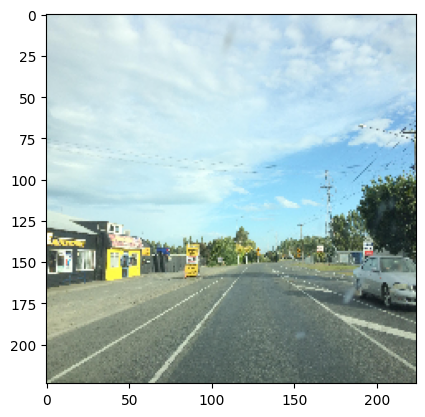

In [7]:
imgplot = plt.imshow(image.astype('uint8'))
print(labels[-1])
print(bboxes[-1])
print(imagePaths[-1])
plt.show()

In [8]:
# normalize -> from [0-255] to [0-1]
data = np.array(data, dtype="float32") / 255.0

# convert to np arrays
labels = np.array(labels)
bboxes = np.array(bboxes, dtype="float32")
imagePaths = np.array(imagePaths)

# one-hot encoding
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
print(labels[-1])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [9]:
# test-train split 20%,80%

split = train_test_split(data,
                         labels,
                         bboxes,
                         imagePaths,
                         test_size=0.20,
                         random_state=12)

In [10]:
(trainImages, testImages) = split[:2]
(trainLabels, testLabels) = split[2:4]

In [11]:
n_images = 52453
input_tensor=Input(shape=(n_images, 224, 224, 3))
print (input_tensor.shape)
flatten_layer = Flatten()
print (input_tensor.shape)
flatten = flatten_layer(input_tensor) 
print (input_tensor.shape)
input_tensor=tf.reshape(input_tensor, [n_images, 224, 224, 3])
flatten = flatten_layer(input_tensor) 
flatten = flatten_layer(flatten) 
print (input_tensor.shape)
print (flatten.shape)

(None, 52453, 224, 224, 3)
(None, 52453, 224, 224, 3)
(None, 52453, 224, 224, 3)
(52453, 224, 224, 3)
(52453, 150528)


In [14]:
dropnum = 0.5

In [14]:
model = keras.Sequential()
print(input_tensor.shape)
print(input_tensor.shape)
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
input_tensor=tf.reshape(input_tensor, [n_images, 224, 224, 3])
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))
print (input_tensor.shape)

model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))


model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(dropnum))

model.add(Dense(166, activation='softmax', name = "class_label"))

(52453, 224, 224, 3)
(52453, 224, 224, 3)
(52453, 224, 224, 3)


In [12]:
INIT_LR = 1e-4
NUM_EPOCHS = 26
BATCH_SIZE = 4

In [13]:
losses = {
    "class_label": "categorical_crossentropy",
    # "bounding_box": "mean_squared_error",
}

lossWeights = {
    "class_label": 1.0,
    # "bounding_box": 1.0
}

trainTargets = {
    "class_label": trainLabels,
    # "bounding_box": trainBBoxes
}

testTargets = {
    "class_label": testLabels,
    # "bounding_box": testBBoxes
}

In [17]:
opt = Adam(INIT_LR)

model.compile(loss=losses, 
              optimizer=opt, 
              metrics=["accuracy"], 
              loss_weights=lossWeights)

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_3 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 106, 106, 64)      36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 53, 53, 64)       0         
 2D)                                                  

In [18]:
#Dropout of 0.5 2 set
H1 = model.fit(
    trainImages, trainTargets,
    validation_data=(testImages, testTargets),
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    verbose=1,
    )

Epoch 1/26
145/145 [==============================] - 313s 2s/step - loss: 3.6881 - accuracy: 0.4835 - val_loss: 3.4516 - val_accuracy: 0.4966
Epoch 2/26
145/145 [==============================] - 310s 2s/step - loss: 3.5242 - accuracy: 0.4922 - val_loss: 3.4635 - val_accuracy: 0.4966
Epoch 3/26
145/145 [==============================] - 310s 2s/step - loss: 3.3310 - accuracy: 0.4939 - val_loss: 3.4790 - val_accuracy: 0.4966
Epoch 4/26
145/145 [==============================] - 308s 2s/step - loss: 3.1438 - accuracy: 0.4939 - val_loss: 3.5319 - val_accuracy: 0.4966
Epoch 5/26
145/145 [==============================] - 310s 2s/step - loss: 2.8459 - accuracy: 0.4974 - val_loss: 3.4845 - val_accuracy: 0.4966
Epoch 6/26
145/145 [==============================] - 308s 2s/step - loss: 2.3564 - accuracy: 0.5130 - val_loss: 3.9628 - val_accuracy: 0.4966
Epoch 7/26
145/145 [==============================] - 311s 2s/step - loss: 1.5736 - accuracy: 0.6049 - val_loss: 4.4515 - val_accuracy: 0.4966

In [19]:
score = model.evaluate(trainImages, trainTargets, verbose = 1) 

print('Train loss:', score[0]) 
print('Train accuracy:', score[1])

score = model.evaluate(testImages, testTargets, verbose = 1) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

19/19 [==============================] - 37s 2s/step - loss: 4.3518e-04 - accuracy: 1.0000
Train loss: 0.0004351791285444051
Train accuracy: 1.0
5/5 [==============================] - 10s 2s/step - loss: 9.5989 - accuracy: 0.4759
Test loss: 9.598873138427734
Test accuracy: 0.475862056016922


In [18]:
model2 = keras.Sequential()

model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model2.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
input_tensor=tf.reshape(input_tensor, [n_images, 224, 224, 3])
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))


model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(dropnum))

model2.add(Dense(166, activation='softmax', name = "class_label"))

In [19]:
opt = Adam(INIT_LR)

model2.compile(loss=losses, 
              optimizer=opt, 
              metrics=["accuracy"], 
              loss_weights=lossWeights)

print(model2.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 387200)            0         
                                                                 
 dense (Dense)               (None, 256)               99123456  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                        

In [20]:
#Dropout of 0.5 1 set
H2 = model2.fit(
    trainImages, trainTargets,
    validation_data=(testImages, testTargets),
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    verbose=1,
    )

Epoch 1/26
145/145 [==============================] - 490s 3s/step - loss: 4.0409 - accuracy: 0.4558 - val_loss: 3.6615 - val_accuracy: 0.4966
Epoch 2/26
145/145 [==============================] - 491s 3s/step - loss: 3.6263 - accuracy: 0.4887 - val_loss: 3.5171 - val_accuracy: 0.4966
Epoch 3/26
145/145 [==============================] - 491s 3s/step - loss: 3.2965 - accuracy: 0.4939 - val_loss: 3.7036 - val_accuracy: 0.4966
Epoch 4/26
145/145 [==============================] - 488s 3s/step - loss: 2.9010 - accuracy: 0.4957 - val_loss: 3.4920 - val_accuracy: 0.4966
Epoch 5/26
145/145 [==============================] - 486s 3s/step - loss: 2.4235 - accuracy: 0.5009 - val_loss: 3.6492 - val_accuracy: 0.4966
Epoch 6/26
145/145 [==============================] - 487s 3s/step - loss: 1.9972 - accuracy: 0.5338 - val_loss: 3.8956 - val_accuracy: 0.4966
Epoch 7/26
145/145 [==============================] - 486s 3s/step - loss: 1.5678 - accuracy: 0.5789 - val_loss: 3.8996 - val_accuracy: 0.4966

In [21]:
score = model2.evaluate(trainImages, trainTargets, verbose = 1) 

print('Train loss:', score[0]) 
print('Train accuracy:', score[1])

score = model2.evaluate(testImages, testTargets, verbose = 1) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

19/19 [==============================] - 25s 1s/step - loss: 0.0028 - accuracy: 1.0000
Train loss: 0.0028099259361624718
Train accuracy: 1.0
5/5 [==============================] - 7s 1s/step - loss: 7.9239 - accuracy: 0.4966
Test loss: 7.923882961273193
Test accuracy: 0.4965517222881317


In [22]:
model3 = keras.Sequential()

model3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model3.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
input_tensor=tf.reshape(input_tensor, [n_images, 224, 224, 3])
model3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))

model3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model3.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))
model3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model3.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))


model3.add(Flatten())
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(dropnum))

model3.add(Dense(166, activation='softmax', name = "class_label"))

In [23]:
opt = Adam(INIT_LR)

model3.compile(loss=losses, 
              optimizer=opt, 
              metrics=["accuracy"], 
              loss_weights=lossWeights)

print(model3.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_3 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 108, 108, 32)      9248      
                                                                 
 conv2d_5 (Conv2D)           (None, 106, 106, 32)      9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 53, 53, 32)       0         
 2D)                                                  

In [24]:
#Dropout of 0.5 3 set
H3 = model3.fit(
    trainImages, trainTargets,
    validation_data=(testImages, testTargets),
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    verbose=1,
    )

Epoch 1/26
145/145 [==============================] - 148s 1s/step - loss: 3.7374 - accuracy: 0.4887 - val_loss: 3.4638 - val_accuracy: 0.4966
Epoch 2/26
145/145 [==============================] - 147s 1s/step - loss: 3.5276 - accuracy: 0.4939 - val_loss: 3.5257 - val_accuracy: 0.4966
Epoch 3/26
145/145 [==============================] - 150s 1s/step - loss: 3.4043 - accuracy: 0.4939 - val_loss: 3.4731 - val_accuracy: 0.4966
Epoch 4/26
145/145 [==============================] - 145s 1s/step - loss: 3.3657 - accuracy: 0.4939 - val_loss: 3.4890 - val_accuracy: 0.4966
Epoch 5/26
145/145 [==============================] - 141s 971ms/step - loss: 3.3361 - accuracy: 0.4939 - val_loss: 3.5105 - val_accuracy: 0.4966
Epoch 6/26
145/145 [==============================] - 148s 1s/step - loss: 3.3055 - accuracy: 0.4939 - val_loss: 3.5687 - val_accuracy: 0.4966
Epoch 7/26
145/145 [==============================] - 143s 989ms/step - loss: 3.1940 - accuracy: 0.4939 - val_loss: 3.7223 - val_accuracy: 

In [25]:
score = model3.evaluate(trainImages, trainTargets, verbose = 1) 

print('Train loss:', score[0]) 
print('Train accuracy:', score[1])

score = model3.evaluate(testImages, testTargets, verbose = 1) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

19/19 [==============================] - 28s 1s/step - loss: 8.4544e-04 - accuracy: 1.0000
Train loss: 0.0008454399066977203
Train accuracy: 1.0
5/5 [==============================] - 7s 1s/step - loss: 13.8918 - accuracy: 0.4828
Test loss: 13.891799926757812
Test accuracy: 0.48275861144065857


In [17]:
model4 = keras.Sequential()

model4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model4.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
input_tensor=tf.reshape(input_tensor, [n_images, 224, 224, 3])
model4.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))

model4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model4.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model4.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))
model4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model4.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model4.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))
model4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model4.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model4.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))


model4.add(Flatten())
model4.add(Dense(256, activation='relu'))
model4.add(Dropout(dropnum))

model4.add(Dense(166, activation='softmax', name = "class_label"))

In [18]:
opt = Adam(INIT_LR)

model4.compile(loss=losses, 
              optimizer=opt, 
              metrics=["accuracy"], 
              loss_weights=lossWeights)

print(model4.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 32)      9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 32)       0         
 2D)                                                    

In [19]:
#Dropout of 0.5 4 set
H4 = model4.fit(
    trainImages, trainTargets,
    validation_data=(testImages, testTargets),
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    verbose=1,
    )

Epoch 1/26
145/145 [==============================] - 137s 930ms/step - loss: 3.8625 - accuracy: 0.4679 - val_loss: 3.4150 - val_accuracy: 0.4966
Epoch 2/26
145/145 [==============================] - 132s 910ms/step - loss: 3.4534 - accuracy: 0.4939 - val_loss: 3.5214 - val_accuracy: 0.4966
Epoch 3/26
145/145 [==============================] - 134s 925ms/step - loss: 3.3513 - accuracy: 0.4939 - val_loss: 3.4416 - val_accuracy: 0.4966
Epoch 4/26
145/145 [==============================] - 130s 899ms/step - loss: 3.3353 - accuracy: 0.4939 - val_loss: 3.4956 - val_accuracy: 0.4966
Epoch 5/26
145/145 [==============================] - 130s 900ms/step - loss: 3.3273 - accuracy: 0.4939 - val_loss: 3.5313 - val_accuracy: 0.4966
Epoch 6/26
145/145 [==============================] - 136s 937ms/step - loss: 3.2705 - accuracy: 0.4939 - val_loss: 3.5703 - val_accuracy: 0.4966
Epoch 7/26
145/145 [==============================] - 131s 907ms/step - loss: 3.3110 - accuracy: 0.4939 - val_loss: 3.5763 -

In [20]:
score = model4.evaluate(trainImages, trainTargets, verbose = 1) 

print('Train loss:', score[0]) 
print('Train accuracy:', score[1])

score = model4.evaluate(testImages, testTargets, verbose = 1) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

19/19 [==============================] - 26s 1s/step - loss: 1.6030 - accuracy: 0.5771
Train loss: 1.602974772453308
Train accuracy: 0.5771230459213257
5/5 [==============================] - 6s 1s/step - loss: 5.0822 - accuracy: 0.4897
Test loss: 5.082164287567139
Test accuracy: 0.48965516686439514


In [14]:
dropnum = 0.2

In [22]:
model5 = keras.Sequential()

model5.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model5.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
input_tensor=tf.reshape(input_tensor, [n_images, 224, 224, 3])
model5.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))


model5.add(Flatten())
model5.add(Dense(256, activation='relu'))
model5.add(Dropout(dropnum))

model5.add(Dense(166, activation='softmax', name = "class_label"))

In [23]:
opt = Adam(INIT_LR)

model5.compile(loss=losses, 
              optimizer=opt, 
              metrics=["accuracy"], 
              loss_weights=lossWeights)

print(model5.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 387200)            0         
                                                                 
 dense_1 (Dense)             (None, 256)               99123456  
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                      

In [24]:
#Dropout of 0.2 1 set
H5 = model5.fit(
    trainImages, trainTargets,
    validation_data=(testImages, testTargets),
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    verbose=1,
    )

Epoch 1/26
145/145 [==============================] - 460s 3s/step - loss: 3.8366 - accuracy: 0.4853 - val_loss: 3.5309 - val_accuracy: 0.4966
Epoch 2/26
145/145 [==============================] - 459s 3s/step - loss: 3.2971 - accuracy: 0.4939 - val_loss: 3.4707 - val_accuracy: 0.4966
Epoch 3/26
145/145 [==============================] - 454s 3s/step - loss: 2.7947 - accuracy: 0.4939 - val_loss: 3.5600 - val_accuracy: 0.4966
Epoch 4/26
145/145 [==============================] - 452s 3s/step - loss: 2.0960 - accuracy: 0.5269 - val_loss: 3.6678 - val_accuracy: 0.4966
Epoch 5/26
145/145 [==============================] - 450s 3s/step - loss: 1.2754 - accuracy: 0.6655 - val_loss: 3.8644 - val_accuracy: 0.4966
Epoch 6/26
145/145 [==============================] - 452s 3s/step - loss: 0.6467 - accuracy: 0.8267 - val_loss: 4.5658 - val_accuracy: 0.4966
Epoch 7/26
145/145 [==============================] - 450s 3s/step - loss: 0.2857 - accuracy: 0.9376 - val_loss: 5.0494 - val_accuracy: 0.4966

In [25]:
score = model5.evaluate(trainImages, trainTargets, verbose = 1) 

print('Train loss:', score[0]) 
print('Train accuracy:', score[1])

score = model5.evaluate(testImages, testTargets, verbose = 1) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

19/19 [==============================] - 22s 1s/step - loss: 0.0029 - accuracy: 1.0000
Train loss: 0.002908945782110095
Train accuracy: 1.0
5/5 [==============================] - 5s 956ms/step - loss: 6.6909 - accuracy: 0.4966
Test loss: 6.690941333770752
Test accuracy: 0.4965517222881317


In [14]:
model6 = keras.Sequential()

model6.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model6.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
input_tensor=tf.reshape(input_tensor, [n_images, 224, 224, 3])
model6.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))

model6.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model6.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model6.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))


model6.add(Flatten())
model6.add(Dense(256, activation='relu'))
model6.add(Dropout(dropnum))

model6.add(Dense(166, activation='softmax', name = "class_label"))

In [15]:
opt = Adam(INIT_LR)

model6.compile(loss=losses, 
              optimizer=opt, 
              metrics=["accuracy"], 
              loss_weights=lossWeights)

print(model6.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 32)      9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 32)       0         
 2D)                                                    

In [16]:
#Dropout of 0.2 2 set
H6 = model6.fit(
    trainImages, trainTargets,
    validation_data=(testImages, testTargets),
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    verbose=1,
    )

Epoch 1/26
145/145 [==============================] - 221s 2s/step - loss: 3.5400 - accuracy: 0.4835 - val_loss: 3.4711 - val_accuracy: 0.4966
Epoch 2/26
145/145 [==============================] - 217s 2s/step - loss: 3.2882 - accuracy: 0.4939 - val_loss: 3.5870 - val_accuracy: 0.4966
Epoch 3/26
145/145 [==============================] - 214s 1s/step - loss: 3.1208 - accuracy: 0.4939 - val_loss: 3.5344 - val_accuracy: 0.4966
Epoch 4/26
145/145 [==============================] - 219s 2s/step - loss: 2.8695 - accuracy: 0.4939 - val_loss: 3.7771 - val_accuracy: 0.4966
Epoch 5/26
145/145 [==============================] - 219s 2s/step - loss: 2.2935 - accuracy: 0.5113 - val_loss: 3.7743 - val_accuracy: 0.4966
Epoch 6/26
145/145 [==============================] - 219s 2s/step - loss: 1.2651 - accuracy: 0.6672 - val_loss: 4.6148 - val_accuracy: 0.4828
Epoch 7/26
145/145 [==============================] - 219s 2s/step - loss: 0.4514 - accuracy: 0.8787 - val_loss: 5.1948 - val_accuracy: 0.4483

In [17]:
score = model6.evaluate(trainImages, trainTargets, verbose = 1) 

print('Train loss:', score[0]) 
print('Train accuracy:', score[1])

score = model6.evaluate(testImages, testTargets, verbose = 1) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

19/19 [==============================] - 29s 1s/step - loss: 4.6025e-04 - accuracy: 1.0000
Train loss: 0.00046024733455851674
Train accuracy: 1.0
5/5 [==============================] - 9s 2s/step - loss: 9.6173 - accuracy: 0.4759
Test loss: 9.61732006072998
Test accuracy: 0.475862056016922


In [15]:
model7 = keras.Sequential()

model7.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model7.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
input_tensor=tf.reshape(input_tensor, [n_images, 224, 224, 3])
model7.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))

model7.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model7.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model7.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))

model7.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model7.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model7.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))


model7.add(Flatten())
model7.add(Dense(256, activation='relu'))
model7.add(Dropout(dropnum))

model7.add(Dense(166, activation='softmax', name = "class_label"))

In [16]:
opt = Adam(INIT_LR)

model7.compile(loss=losses, 
              optimizer=opt, 
              metrics=["accuracy"], 
              loss_weights=lossWeights)

print(model7.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 32)      9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 32)       0         
 2D)                                                    

In [17]:
#Dropout of 0.2 3 set
H7 = model7.fit(
    trainImages, trainTargets,
    validation_data=(testImages, testTargets),
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    verbose=1,
    )

Epoch 1/26
145/145 [==============================] - 145s 991ms/step - loss: 3.5843 - accuracy: 0.4887 - val_loss: 3.4145 - val_accuracy: 0.4966
Epoch 2/26
145/145 [==============================] - 141s 977ms/step - loss: 3.3376 - accuracy: 0.4939 - val_loss: 3.4786 - val_accuracy: 0.4966
Epoch 3/26
145/145 [==============================] - 138s 949ms/step - loss: 3.2564 - accuracy: 0.4939 - val_loss: 3.5208 - val_accuracy: 0.4966
Epoch 4/26
145/145 [==============================] - 142s 982ms/step - loss: 3.2056 - accuracy: 0.4939 - val_loss: 3.5381 - val_accuracy: 0.4966
Epoch 5/26
145/145 [==============================] - 138s 950ms/step - loss: 3.1865 - accuracy: 0.4939 - val_loss: 3.5620 - val_accuracy: 0.4966
Epoch 6/26
145/145 [==============================] - 140s 969ms/step - loss: 3.0830 - accuracy: 0.4939 - val_loss: 3.6322 - val_accuracy: 0.4966
Epoch 7/26
145/145 [==============================] - 135s 931ms/step - loss: 2.9710 - accuracy: 0.4939 - val_loss: 3.9134 -

In [18]:
score = model7.evaluate(trainImages, trainTargets, verbose = 1) 

print('Train loss:', score[0]) 
print('Train accuracy:', score[1])

score = model7.evaluate(testImages, testTargets, verbose = 1) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

19/19 [==============================] - 27s 1s/step - loss: 0.0118 - accuracy: 0.9983
Train loss: 0.011771704070270061
Train accuracy: 0.998266875743866
5/5 [==============================] - 6s 1s/step - loss: 13.2425 - accuracy: 0.4414
Test loss: 13.242542266845703
Test accuracy: 0.4413793087005615


In [19]:
model8 = keras.Sequential()

model8.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model8.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
input_tensor=tf.reshape(input_tensor, [n_images, 224, 224, 3])
model8.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))

model8.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model8.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model8.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))

model8.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model8.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model8.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))

model8.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model8.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model8.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))


model8.add(Flatten())
model8.add(Dense(256, activation='relu'))
model8.add(Dropout(dropnum))

model8.add(Dense(166, activation='softmax', name = "class_label"))

In [20]:
opt = Adam(INIT_LR)

model8.compile(loss=losses, 
              optimizer=opt, 
              metrics=["accuracy"], 
              loss_weights=lossWeights)

print(model8.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 108, 108, 32)      9248      
                                                                 
 conv2d_9 (Conv2D)           (None, 106, 106, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 53, 53, 32)       0         
 2D)                                                  

In [21]:
#Dropout of 0.2 4 set
H8 = model8.fit(
    trainImages, trainTargets,
    validation_data=(testImages, testTargets),
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    verbose=1,
    )

Epoch 1/26
145/145 [==============================] - 132s 900ms/step - loss: 3.6420 - accuracy: 0.4818 - val_loss: 3.4085 - val_accuracy: 0.4966
Epoch 2/26
145/145 [==============================] - 125s 862ms/step - loss: 3.2762 - accuracy: 0.4939 - val_loss: 3.4135 - val_accuracy: 0.4966
Epoch 3/26
145/145 [==============================] - 127s 874ms/step - loss: 3.2263 - accuracy: 0.4939 - val_loss: 3.4831 - val_accuracy: 0.4966
Epoch 4/26
145/145 [==============================] - 127s 878ms/step - loss: 3.2256 - accuracy: 0.4939 - val_loss: 3.5818 - val_accuracy: 0.4966
Epoch 5/26
145/145 [==============================] - 126s 867ms/step - loss: 3.2111 - accuracy: 0.4939 - val_loss: 3.6492 - val_accuracy: 0.4966
Epoch 6/26
145/145 [==============================] - 129s 888ms/step - loss: 3.1908 - accuracy: 0.4939 - val_loss: 3.6121 - val_accuracy: 0.4966
Epoch 7/26
145/145 [==============================] - 128s 887ms/step - loss: 3.1716 - accuracy: 0.4939 - val_loss: 3.6510 -

In [22]:
score = model8.evaluate(trainImages, trainTargets, verbose = 1) 

print('Train loss:', score[0]) 
print('Train accuracy:', score[1])

score = model8.evaluate(testImages, testTargets, verbose = 1) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

19/19 [==============================] - 28s 1s/step - loss: 0.0062 - accuracy: 1.0000
Train loss: 0.00618231063708663
Train accuracy: 1.0
5/5 [==============================] - 6s 1s/step - loss: 16.6168 - accuracy: 0.4414
Test loss: 16.61675453186035
Test accuracy: 0.4413793087005615


In [ ]:
# All of this is extra numbers \/

In [ ]:
#Dropout of 0.2
H1 = model.fit(
    trainImages, trainTargets,
    validation_data=(testImages, testTargets),
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    verbose=1,
    )

Epoch 1/10
19/19 [==============================] - 195s 10s/step - loss: 0.1666 - accuracy: 0.9601 - val_loss: 6.6156 - val_accuracy: 0.4759
Epoch 2/10
19/19 [==============================] - 209s 11s/step - loss: 0.0882 - accuracy: 0.9861 - val_loss: 6.9014 - val_accuracy: 0.4828
Epoch 3/10
19/19 [==============================] - 194s 10s/step - loss: 0.0512 - accuracy: 0.9931 - val_loss: 6.9766 - val_accuracy: 0.4759
Epoch 4/10
19/19 [==============================] - 203s 11s/step - loss: 0.0367 - accuracy: 0.9948 - val_loss: 7.5728 - val_accuracy: 0.4897
Epoch 5/10
19/19 [==============================] - 196s 10s/step - loss: 0.0447 - accuracy: 0.9965 - val_loss: 8.2119 - val_accuracy: 0.4897
Epoch 6/10
19/19 [==============================] - 193s 10s/step - loss: 0.0370 - accuracy: 0.9879 - val_loss: 7.6159 - val_accuracy: 0.4897
Epoch 7/10
19/19 [==============================] - 203s 11s/step - loss: 0.0348 - accuracy: 0.9931 - val_loss: 6.6688 - val_accuracy: 0.4759
Epoch 

In [ ]:
score = model.evaluate(testImages, testTargets, verbose = 1) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

5/5 [==============================] - 10s 2s/step - loss: 5.6453 - accuracy: 0.4897
Test loss: 5.645301342010498
Test accuracy: 0.48965516686439514


In [ ]:
#Dropout of 0.2 testing different batch size
H1 = model.fit(
    trainImages, trainTargets,
    validation_data=(testImages, testTargets),
    batch_size=8,
    epochs=NUM_EPOCHS,
    verbose=1,
    )

Epoch 1/10
73/73 [==============================] - 244s 3s/step - loss: 0.0443 - accuracy: 0.9896 - val_loss: 6.9010 - val_accuracy: 0.4690
Epoch 2/10
73/73 [==============================] - 234s 3s/step - loss: 0.0838 - accuracy: 0.9913 - val_loss: 8.5207 - val_accuracy: 0.4828
Epoch 3/10
73/73 [==============================] - 233s 3s/step - loss: 0.0480 - accuracy: 0.9896 - val_loss: 8.5172 - val_accuracy: 0.4759
Epoch 4/10
73/73 [==============================] - 242s 3s/step - loss: 0.0137 - accuracy: 0.9983 - val_loss: 8.8188 - val_accuracy: 0.4138
Epoch 5/10
73/73 [==============================] - 239s 3s/step - loss: 0.0134 - accuracy: 0.9983 - val_loss: 9.5510 - val_accuracy: 0.4759
Epoch 6/10
73/73 [==============================] - 242s 3s/step - loss: 0.0122 - accuracy: 0.9983 - val_loss: 9.7093 - val_accuracy: 0.4897
Epoch 7/10
73/73 [==============================] - 240s 3s/step - loss: 0.0319 - accuracy: 0.9948 - val_loss: 8.9842 - val_accuracy: 0.4966
Epoch 8/10
73

In [ ]:
score = model.evaluate(testImages, testTargets, verbose = 1) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

5/5 [==============================] - 11s 2s/step - loss: 10.8182 - accuracy: 0.4828
Test loss: 10.818187713623047
Test accuracy: 0.48275861144065857


In [ ]:
#Dropout of 0.2 testing different low batch size
H1 = model.fit(
    trainImages, trainTargets,
    validation_data=(testImages, testTargets),
    batch_size=1,
    epochs=NUM_EPOCHS,
    verbose=1,
    )

Epoch 1/10
577/577 [==============================] - 602s 1s/step - loss: 3.5650 - accuracy: 0.4922 - val_loss: 3.4868 - val_accuracy: 0.4966
Epoch 2/10
577/577 [==============================] - 581s 1s/step - loss: 3.2831 - accuracy: 0.4939 - val_loss: 3.5555 - val_accuracy: 0.4966
Epoch 3/10
577/577 [==============================] - 586s 1s/step - loss: 3.1174 - accuracy: 0.4939 - val_loss: 3.9256 - val_accuracy: 0.4966
Epoch 4/10
577/577 [==============================] - 585s 1s/step - loss: 2.6958 - accuracy: 0.4939 - val_loss: 4.7144 - val_accuracy: 0.4966
Epoch 5/10
577/577 [==============================] - 576s 998ms/step - loss: 1.7642 - accuracy: 0.5615 - val_loss: 5.0830 - val_accuracy: 0.4897
Epoch 6/10
577/577 [==============================] - 600s 1s/step - loss: 0.6625 - accuracy: 0.8146 - val_loss: 5.8778 - val_accuracy: 0.3931
Epoch 7/10
577/577 [==============================] - 610s 1s/step - loss: 0.2503 - accuracy: 0.9237 - val_loss: 9.1119 - val_accuracy: 0.4

In [ ]:
#Dropout of 0.2 testing no batch size inputed
H21 = model.fit(
    trainImages, trainTargets,
    validation_data=(testImages, testTargets),
    epochs=NUM_EPOCHS,
    verbose=1,
    )

Epoch 1/10
19/19 [==============================] - 174s 9s/step - loss: 0.0319 - accuracy: 0.9948 - val_loss: 10.0424 - val_accuracy: 0.4552
Epoch 2/10
19/19 [==============================] - 180s 9s/step - loss: 0.0195 - accuracy: 0.9983 - val_loss: 10.3947 - val_accuracy: 0.4690
Epoch 3/10
19/19 [==============================] - 168s 9s/step - loss: 0.0245 - accuracy: 0.9983 - val_loss: 10.8998 - val_accuracy: 0.4759
Epoch 4/10
19/19 [==============================] - 169s 9s/step - loss: 0.0228 - accuracy: 0.9948 - val_loss: 11.0422 - val_accuracy: 0.4759
Epoch 5/10
19/19 [==============================] - 171s 9s/step - loss: 0.0182 - accuracy: 0.9983 - val_loss: 11.1500 - val_accuracy: 0.4828
Epoch 6/10
19/19 [==============================] - 171s 9s/step - loss: 0.0144 - accuracy: 0.9983 - val_loss: 11.4155 - val_accuracy: 0.4759
Epoch 7/10
19/19 [==============================] - 170s 9s/step - loss: 0.0134 - accuracy: 0.9965 - val_loss: 11.6347 - val_accuracy: 0.4759
Epoch 

In [ ]:
#Dropout of 0.5
H = model.fit(
    trainImages, trainTargets,
    validation_data=(testImages, testTargets),
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    verbose=1,
    )

In [ ]:
#removed 2nd conv2d layer
model2 = keras.Sequential()
model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
# model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))

input_tensor=tf.reshape(input_tensor, [n_images, 224, 224, 3])
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))

model2.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model2.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))


model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.5))

model2.add(Dense(166, activation='softmax', name = "class_label"))



(52453, 224, 224, 3)


In [ ]:
opt = Adam(INIT_LR)

model2.compile(loss=losses, 
              optimizer=opt, 
              metrics=["accuracy"], 
              loss_weights=lossWeights)

print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 conv2d_6 (Conv2D)           (None, 107, 107, 64)      36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 179776)           

In [ ]:
H2 = model2.fit(
    trainImages, trainTargets,
    validation_data=(testImages, testTargets),
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    verbose=1,
    )

Epoch 1/10
37/37 [==============================] - 149s 4s/step - loss: 3.6588 - accuracy: 0.4835 - val_loss: 3.3987 - val_accuracy: 0.4966
Epoch 2/10
37/37 [==============================] - 129s 3s/step - loss: 3.4369 - accuracy: 0.4939 - val_loss: 3.3427 - val_accuracy: 0.4966
Epoch 3/10
37/37 [==============================] - 133s 4s/step - loss: 3.2988 - accuracy: 0.4939 - val_loss: 3.3738 - val_accuracy: 0.4966
Epoch 4/10
37/37 [==============================] - 132s 4s/step - loss: 3.1808 - accuracy: 0.4939 - val_loss: 3.3462 - val_accuracy: 0.4966
Epoch 5/10
37/37 [==============================] - 133s 4s/step - loss: 2.8852 - accuracy: 0.4939 - val_loss: 3.4496 - val_accuracy: 0.4966
Epoch 6/10
37/37 [==============================] - 126s 3s/step - loss: 2.6368 - accuracy: 0.4957 - val_loss: 3.5267 - val_accuracy: 0.4966
Epoch 7/10
37/37 [==============================] - 125s 3s/step - loss: 2.1906 - accuracy: 0.5165 - val_loss: 3.6406 - val_accuracy: 0.4966
Epoch 8/10
37

In [ ]:
# #removed 3rd layer (max pooling)
# model3 = keras.Sequential()
# model3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
# model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
# input_tensor=tf.reshape(input_tensor, [n_images, 224, 224, 3])
# # model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))

# model3.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
# model3.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
# model3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))


# model3.add(Flatten())
# model3.add(Dense(256, activation='relu'))
# model3.add(Dropout(0.5))

# model3.add(Dense(166, activation='softmax', name = "class_label"))



#Model 3 failed

In [ ]:
# opt = Adam(INIT_LR)

# model3.compile(loss=losses, 
#               optimizer=opt, 
#               metrics=["accuracy"], 
#               loss_weights=lossWeights)

# print(model3.summary())

In [ ]:
# H3 = model3.fit(
#     trainImages, trainTargets,
#     validation_data=(testImages, testTargets),
#     batch_size=BATCH_SIZE,
#     epochs=NUM_EPOCHS,
#     verbose=1,
#     )

In [ ]:
#removed 4th layer (Cov2d)
model4 = keras.Sequential()
model4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model4.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
input_tensor=tf.reshape(input_tensor, [n_images, 224, 224, 3])
model4.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))

# model2.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model4.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model4.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))


model4.add(Flatten())
model4.add(Dense(256, activation='relu'))
model4.add(Dropout(0.5))

model4.add(Dense(166, activation='softmax', name = "class_label"))


In [ ]:
opt = Adam(INIT_LR)

model4.compile(loss=losses, 
              optimizer=opt, 
              metrics=["accuracy"], 
              loss_weights=lossWeights)

print(model4.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_10 (Conv2D)          (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 108, 108, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 186624)           

In [ ]:
H4 = model4.fit(
    trainImages, trainTargets,
    validation_data=(testImages, testTargets),
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    verbose=1,
    )

Epoch 1/10
37/37 [==============================] - 196s 5s/step - loss: 1.3736 - accuracy: 0.6308 - val_loss: 3.8716 - val_accuracy: 0.4897
Epoch 2/10
37/37 [==============================] - 162s 4s/step - loss: 1.2052 - accuracy: 0.6846 - val_loss: 4.4292 - val_accuracy: 0.4966
Epoch 3/10
37/37 [==============================] - 160s 4s/step - loss: 0.9161 - accuracy: 0.7470 - val_loss: 4.1793 - val_accuracy: 0.4966
Epoch 4/10
37/37 [==============================] - 158s 4s/step - loss: 0.7237 - accuracy: 0.8042 - val_loss: 4.3635 - val_accuracy: 0.4966
Epoch 5/10
37/37 [==============================] - 158s 4s/step - loss: 0.5691 - accuracy: 0.8475 - val_loss: 4.7936 - val_accuracy: 0.4966
Epoch 6/10
37/37 [==============================] - 160s 4s/step - loss: 0.3827 - accuracy: 0.8960 - val_loss: 5.4054 - val_accuracy: 0.4966
Epoch 7/10
37/37 [==============================] - 158s 4s/step - loss: 0.3272 - accuracy: 0.9133 - val_loss: 5.6681 - val_accuracy: 0.4966
Epoch 8/10
37

In [ ]:
#removed 4th layer and 5th layer (Cov2d)
model5 = keras.Sequential()
model5.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model5.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
input_tensor=tf.reshape(input_tensor, [n_images, 224, 224, 3])
model5.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))

# model5.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
# model5.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model5.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))


model5.add(Flatten())
model5.add(Dense(256, activation='relu'))
model5.add(Dropout(0.5))

model5.add(Dense(166, activation='softmax', name = "class_label"))


In [ ]:
opt = Adam(INIT_LR)

model5.compile(loss=losses, 
              optimizer=opt, 
              metrics=["accuracy"], 
              loss_weights=lossWeights)

print(model5.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 55, 55, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 96800)             0         
                                                                 
 dense_5 (Dense)             (None, 256)              

In [ ]:
H5 = model5.fit(
    trainImages, trainTargets,
    validation_data=(testImages, testTargets),
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    verbose=1,
    )

Epoch 1/10
37/37 [==============================] - 103s 3s/step - loss: 3.7293 - accuracy: 0.4766 - val_loss: 3.4117 - val_accuracy: 0.4966
Epoch 2/10
37/37 [==============================] - 100s 3s/step - loss: 3.5283 - accuracy: 0.4939 - val_loss: 3.4019 - val_accuracy: 0.4966
Epoch 3/10
37/37 [==============================] - 104s 3s/step - loss: 3.4235 - accuracy: 0.4939 - val_loss: 3.4054 - val_accuracy: 0.4966
Epoch 4/10
37/37 [==============================] - 101s 3s/step - loss: 3.2816 - accuracy: 0.4939 - val_loss: 3.4111 - val_accuracy: 0.4966
Epoch 5/10
37/37 [==============================] - 104s 3s/step - loss: 3.2695 - accuracy: 0.4939 - val_loss: 3.4938 - val_accuracy: 0.4966
Epoch 6/10
37/37 [==============================] - 100s 3s/step - loss: 3.1619 - accuracy: 0.4939 - val_loss: 3.4356 - val_accuracy: 0.4966
Epoch 7/10
37/37 [==============================] - 101s 3s/step - loss: 2.9767 - accuracy: 0.4939 - val_loss: 3.4706 - val_accuracy: 0.4966
Epoch 8/10
37

In [ ]:
#removed bottom max pooling layer
model6 = keras.Sequential()
model6.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model6.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
input_tensor=tf.reshape(input_tensor, [n_images, 224, 224, 3])
model6.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))

model6.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model6.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
# model6.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))


model6.add(Flatten())
model6.add(Dense(256, activation='relu'))
model6.add(Dropout(0.5))

model6.add(Dense(166, activation='softmax', name = "class_label"))


In [ ]:
opt = Adam(INIT_LR)

model6.compile(loss=losses, 
              optimizer=opt, 
              metrics=["accuracy"], 
              loss_weights=lossWeights)

print(model6.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 64)      36928     
                                                                 
 flatten_2 (Flatten)         (None, 719104)            0         
                                                      

In [ ]:
H6 = model6.fit(
    trainImages, trainTargets,
    validation_data=(testImages, testTargets),
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    verbose=1,
    )

Epoch 1/10
37/37 [==============================] - 273s 7s/step - loss: 3.7990 - accuracy: 0.4593 - val_loss: 3.4112 - val_accuracy: 0.4966
Epoch 2/10
37/37 [==============================] - 271s 7s/step - loss: 3.4542 - accuracy: 0.4939 - val_loss: 3.4665 - val_accuracy: 0.4966
Epoch 3/10
37/37 [==============================] - 279s 8s/step - loss: 3.3434 - accuracy: 0.4939 - val_loss: 3.4438 - val_accuracy: 0.4966
Epoch 4/10
37/37 [==============================] - 272s 7s/step - loss: 3.0213 - accuracy: 0.4939 - val_loss: 3.4079 - val_accuracy: 0.4966
Epoch 5/10
37/37 [==============================] - 273s 7s/step - loss: 2.5447 - accuracy: 0.4974 - val_loss: 3.4478 - val_accuracy: 0.4966
Epoch 6/10
37/37 [==============================] - 270s 7s/step - loss: 2.0988 - accuracy: 0.5147 - val_loss: 3.5202 - val_accuracy: 0.4966
Epoch 7/10
37/37 [==============================] - 263s 7s/step - loss: 1.5891 - accuracy: 0.5858 - val_loss: 3.7486 - val_accuracy: 0.4966
Epoch 8/10
37

In [ ]:
# #removed flatten layer
# #This one doesn't work
# model7 = keras.Sequential()
# model7.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
# model7.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
# input_tensor=tf.reshape(input_tensor, [n_images, 224, 224, 3])
# model7.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))

# model7.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
# model7.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
# model7.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))


# # model7.add(Flatten())
# model7.add(Dense(256, activation='relu'))
# model7.add(Dropout(0.5))

# model7.add(Dense(166, activation='softmax', name = "class_label"))


In [ ]:
# opt = Adam(INIT_LR)

# model7.compile(loss=losses, 
#               optimizer=opt, 
#               metrics=["accuracy"], 
#               loss_weights=lossWeights)

# print(model7.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 conv2d_11 (Conv2D)          (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 108, 108, 64)      18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 106, 106, 64)      36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 53, 53, 64)       0         
 2D)                                                  

In [ ]:
# H7 = model7.fit(
#     trainImages, trainTargets,
#     validation_data=(testImages, testTargets),
#     batch_size=BATCH_SIZE,
#     epochs=NUM_EPOCHS,
#     verbose=1,
#     )

In [ ]:
#removed Dense layer (3rd to last layer)
model8 = keras.Sequential()
model8.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model8.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
input_tensor=tf.reshape(input_tensor, [n_images, 224, 224, 3])
model8.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))

model8.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model8.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model8.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))


model8.add(Flatten())
# model8.add(Dense(256, activation='relu'))
model8.add(Dropout(0.5))

model8.add(Dense(166, activation='softmax', name = "class_label"))


In [ ]:
opt = Adam(INIT_LR)

model8.compile(loss=losses, 
              optimizer=opt, 
              metrics=["accuracy"], 
              loss_weights=lossWeights)

print(model8.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 conv2d_15 (Conv2D)          (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 108, 108, 64)      18496     
                                                                 
 conv2d_17 (Conv2D)          (None, 106, 106, 64)      36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 53, 53, 64)       0         
 2D)                                                  

In [ ]:
H8 = model8.fit(
    trainImages, trainTargets,
    validation_data=(testImages, testTargets),
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    verbose=1,
    )

Epoch 1/10
37/37 [==============================] - 172s 5s/step - loss: 3.6441 - accuracy: 0.4801 - val_loss: 3.4704 - val_accuracy: 0.4966
Epoch 2/10
37/37 [==============================] - 170s 5s/step - loss: 3.1439 - accuracy: 0.4939 - val_loss: 3.5360 - val_accuracy: 0.4966
Epoch 3/10
37/37 [==============================] - 168s 5s/step - loss: 2.9884 - accuracy: 0.4939 - val_loss: 3.5929 - val_accuracy: 0.4966
Epoch 4/10
37/37 [==============================] - 169s 5s/step - loss: 2.6743 - accuracy: 0.4939 - val_loss: 3.6071 - val_accuracy: 0.4966
Epoch 5/10
37/37 [==============================] - 171s 5s/step - loss: 2.2084 - accuracy: 0.4939 - val_loss: 3.9411 - val_accuracy: 0.4966
Epoch 6/10
37/37 [==============================] - 169s 5s/step - loss: 1.3812 - accuracy: 0.5754 - val_loss: 5.1907 - val_accuracy: 0.4966
Epoch 7/10
37/37 [==============================] - 171s 5s/step - loss: 0.4589 - accuracy: 0.8440 - val_loss: 6.7146 - val_accuracy: 0.4966
Epoch 8/10
37

In [ ]:
#removed Dropout
model9 = keras.Sequential()
model9.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model9.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
input_tensor=tf.reshape(input_tensor, [n_images, 224, 224, 3])
model9.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))

model9.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model9.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model9.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))


model9.add(Flatten())
model9.add(Dense(256, activation='relu'))
# model9.add(Dropout(0.5))

model9.add(Dense(166, activation='softmax', name = "class_label"))


In [ ]:
opt = Adam(INIT_LR)

model9.compile(loss=losses, 
              optimizer=opt, 
              metrics=["accuracy"], 
              loss_weights=lossWeights)

print(model9.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 64)       0         
 2D)                                                    

In [ ]:
H9 = model9.fit(
    trainImages, trainTargets,
    validation_data=(testImages, testTargets),
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    verbose=1,
    )

Epoch 1/10
37/37 [==============================] - 195s 5s/step - loss: 3.5577 - accuracy: 0.4801 - val_loss: 3.4213 - val_accuracy: 0.4966
Epoch 2/10
37/37 [==============================] - 208s 6s/step - loss: 3.2822 - accuracy: 0.4939 - val_loss: 3.4777 - val_accuracy: 0.4966
Epoch 3/10
37/37 [==============================] - 193s 5s/step - loss: 3.1355 - accuracy: 0.4939 - val_loss: 3.6653 - val_accuracy: 0.4966
Epoch 4/10
37/37 [==============================] - 204s 5s/step - loss: 2.8827 - accuracy: 0.4939 - val_loss: 3.6216 - val_accuracy: 0.4966
Epoch 5/10
37/37 [==============================] - 201s 5s/step - loss: 2.3362 - accuracy: 0.5078 - val_loss: 3.7710 - val_accuracy: 0.4966
Epoch 6/10
37/37 [==============================] - 205s 6s/step - loss: 1.6269 - accuracy: 0.5962 - val_loss: 4.1318 - val_accuracy: 0.4759
Epoch 7/10
37/37 [==============================] - 206s 6s/step - loss: 0.7678 - accuracy: 0.8111 - val_loss: 5.1170 - val_accuracy: 0.4276
Epoch 8/10
37

In [ ]:
# #removed final dense
#This one fails
# model10 = keras.Sequential()
# model10.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
# model10.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
# input_tensor=tf.reshape(input_tensor, [n_images, 224, 224, 3])
# model10.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))

# model10.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
# model10.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
# model10.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))


# model10.add(Flatten())
# model10.add(Dense(256, activation='relu'))
# model10.add(Dropout(0.5))

# # model10.add(Dense(166, activation='softmax', name = "class_label"))


In [ ]:
opt = Adam(INIT_LR)

model10.compile(loss=losses, 
              optimizer=opt, 
              metrics=["accuracy"], 
              loss_weights=lossWeights)

print(model10.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 64)      36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 64)       0         
 2D)                                                  

In [ ]:
# H10 = model10.fit(
#     trainImages, trainTargets,
#     validation_data=(testImages, testTargets),
#     batch_size=BATCH_SIZE,
#     epochs=NUM_EPOCHS,
#     verbose=1,
#     )

In [ ]:
# lossNames = ["loss", 
#              "class_label_loss", 
#              "bounding_box_loss"]

# N = np.arange(0, NUM_EPOCHS)
# plt.style.use("ggplot")
# (fig, ax) = plt.subplots(3, 1, figsize=(17, 25))

# # plotting the loss for training and validation data

# for (i, l) in enumerate(lossNames):
#     title = "Loss for {}".format(l) if l != "loss" else "Total loss"
#     ax[i].set_title(title)
#     ax[i].set_xlabel("Epoch #")
#     ax[i].set_ylabel("Loss")
#     ax[i].plot(N, H.history[l], label=l)
#     ax[i].plot(N, H.history["val_" + l], label="val_" + l)
#     ax[i].legend()

In [ ]:
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn import datasets
# from sklearn.model_selection import train_test_split
# from sklearn import metrics
# from sklearn import preprocessing

In [ ]:
ada = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)

In [ ]:
x_train, x_test, y_train, y_test = image
    # model.fit(x_train, y_train)
    # pred = model.predict(x_test)
    # return accuracy_score(pred, y_test)

ValueError: ignored

In [ ]:
print (trainImages.shape)
X = trainImages
Y = testImages
print (trainImages.shape)
print (testImages.shape)
x_train, x_test, y_train, y_test = train_test_split(X, test_size=0.2)
print (y_train.shape)

(577, 224, 224, 3)
(577, 224, 224, 3)
(145, 224, 224, 3)


ValueError: ignored

In [ ]:
print(image.shape)
pics = flatten_layer(image)
pics3 = flatten_layer(image)
print(pics.shape)
pics2 = pics[1]
y = tf.Variable(tf.random.uniform([224], minval=0, maxval=224, dtype=tf.int32))
print(y.shape)

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)
# test = tf.reshape(pics, [224])
# print(pics[0:1])
# pics3 = pics[0]
print (pics2.shape)
print (pics3.shape)
(X_train, y_train, X_test, y_test) = pics[:4] 

X_train = tf.reshape(X_train, [-1,1])
print (X_train.shape)

# pics4 = np.expand_dims(pics, axis = -1)
pics4 = np.reshape(pics, (pics.shape[0], -1))
print (pics.shape)
print (pics4.shape)


x_train, x_test, y_train, y_test = train_test_split(pics, y, test_size=0.2)
# (X_train, y_train) = trainImages[:2]
# print (X_train.shape)
# print (y_train.shape)

(224, 224, 3)
(224, 672)
(224,)
(672,)
(224, 672)
(672, 1)
(224, 672)
(224, 672)


TypeError: ignored

In [ ]:
model2 = ada.fit(pics, y)

In [ ]:
model.save("model_bbox_regression_and_classification", save_format="h5")